# BOSTON MARATHON

# I INTRODUCTION:

Bib: Athlete's number

Name: Athlete's name

Age: Athlete's age

M/F:Male or Female

City: Athele's city

State: Athele's state

Country: Athele's country

Citizen: Athele's nationality

5K: Running time 5km

10km: Running time 10km

15km: Running time 15km

20km: Running time 20km

Half: Running time Half

25km: Running time 25km

30km: Running time 30km

35km: Running time 35km

40km: Running time 40km

Pace: Running time in 1 minute

Proj Time: 

Official Time: Official runtime

Overall: Ranking on total number of athele

Gender: Ranking by gender

Division: Ranking by age

# II CONTENT:

## 1. Import packets and dataset

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
original  = pd.read_csv('marathon_results_2016.csv')

In [3]:
original.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


In [4]:
original.shape

(26630, 24)

In [5]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26630 entries, 0 to 26629
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Bib            26630 non-null  object
 1   Name           26630 non-null  object
 2   Age            26630 non-null  int64 
 3   M/F            26630 non-null  object
 4   City           26629 non-null  object
 5   State          23783 non-null  object
 6   Country        26630 non-null  object
 7   Citizen        1122 non-null   object
 8   Unnamed: 8     83 non-null     object
 9   5K             26630 non-null  object
 10  10K            26630 non-null  object
 11  15K            26630 non-null  object
 12  20K            26630 non-null  object
 13  Half           26630 non-null  object
 14  25K            26630 non-null  object
 15  30K            26630 non-null  object
 16  35K            26630 non-null  object
 17  40K            26630 non-null  object
 18  Pace           26630 non-n

int64: 4 features

object: 20 features

 # 2. Handle missing value

In [6]:
types = original.dtypes.to_frame().rename(columns={0:'dtypes'})
null = original.isnull().sum().to_frame().rename(columns={0:'missing values'})
null_percent = (original.isnull().sum()/original.shape[0]*100).to_frame().rename(columns={0:'% missing values'})
df_missing = pd.concat([types, null, null_percent], axis=1)
df_missing

,dtypes,missing values,% missing values
Bib,object,0,0.000000
Name,object,0,0.000000
Age,int64,0,0.000000
M/F,object,0,0.000000
City,object,1,0.003755
State,object,2847,10.690950
Country,object,0,0.000000
Citizen,object,25508,95.786707
Unnamed: 8,object,26547,99.688321
5K,object,0,0.000000


In [7]:
#Drop feature Rank_Tot and Country_code
df1 = original.drop(columns = {'Bib', 'Unnamed: 8','City', 'Citizen', 'Proj Time'})
df1 = df1.dropna()

In [8]:
df1.head()

,Name,Age,M/F,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
9,"Hine, Zachary",28,M,TX,USA,0:16:03,0:32:08,0:48:14,1:04:25,1:07:57,1:20:38,1:37:26,1:54:46,2:12:47,0:05:25,2:21:37,10,10,10
12,"Burrell, Ian",31,M,CO,USA,0:15:54,0:31:47,0:47:53,1:04:44,1:08:24,1:21:45,1:39:24,1:57:02,2:14:39,0:05:26,2:22:22,13,13,13
14,"Okuti, Harbert",30,M,NY,USA,0:15:53,0:32:00,0:48:23,1:05:11,1:08:48,1:22:16,1:39:45,1:57:52,2:16:22,0:05:32,2:24:46,15,15,15
16,"Wells, Clint",40,M,CO,USA,0:16:26,0:32:52,0:49:30,1:06:29,1:10:15,1:23:42,1:41:18,1:59:16,2:16:51,0:05:32,2:24:55,17,17,1
20,"Williams, Andy",28,M,IN,USA,0:16:21,0:33:03,0:50:17,1:07:54,1:11:40,1:25:23,1:43:23,2:01:45,2:19:24,0:05:37,2:27:07,21,21,20


## 3 Univariate analysis

### 3.1 Object variable

In [9]:
df1.describe(include = "O")

,Name,M/F,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
count,23783,23783,23783,23783,23783,23783,23783,23783,23783,23783,23783,23783,23783,23783,23783
unique,23718,2,67,2,1285,2425,3487,4497,4724,5519,6504,7502,8292,529,8558
top,"Hoffman, Jennifer",M,MA,USA,0:24:45,0:49:43,1:13:32,1:38:27,1:44:40,2:05:51,-,3:03:19,3:40:02,0:08:56,3:36:17
freq,3,12370,4636,21649,68,39,30,24,23,19,19,17,14,140,14


#### M/F

In [10]:
gender = df1['M/F'].value_counts()

<AxesSubplot:title={'center':'Participation rate by gender'}, ylabel='M/F'>

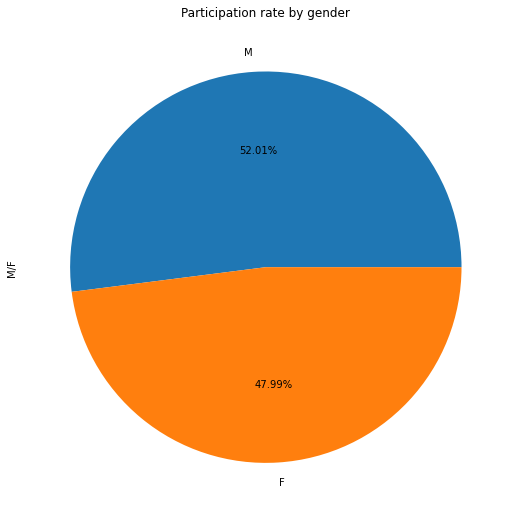

In [11]:
f,ax=plt.subplots(1,1,figsize=(15,9))
ax.set_ylabel('')
ax.set_title('Participation rate by gender')
df1['M/F'].value_counts().plot.pie(autopct='%1.2f%%', shadow=False)

In [12]:
gender

M    12370
F    11413
Name: M/F, dtype: int64

In [13]:
print(" Total number of athletes participating: ", gender.values[0] + gender.values[1])

 Total number of athletes participating:  23783


Athlete's female rate is less than athlete's male rate 

#### Country

In [14]:
df1['Country'].value_counts()

USA    21649
CAN     2134
Name: Country, dtype: int64

In [15]:
males = df1[df1['M/F'] == 'M']
females = df1[df1['M/F'] == 'F']

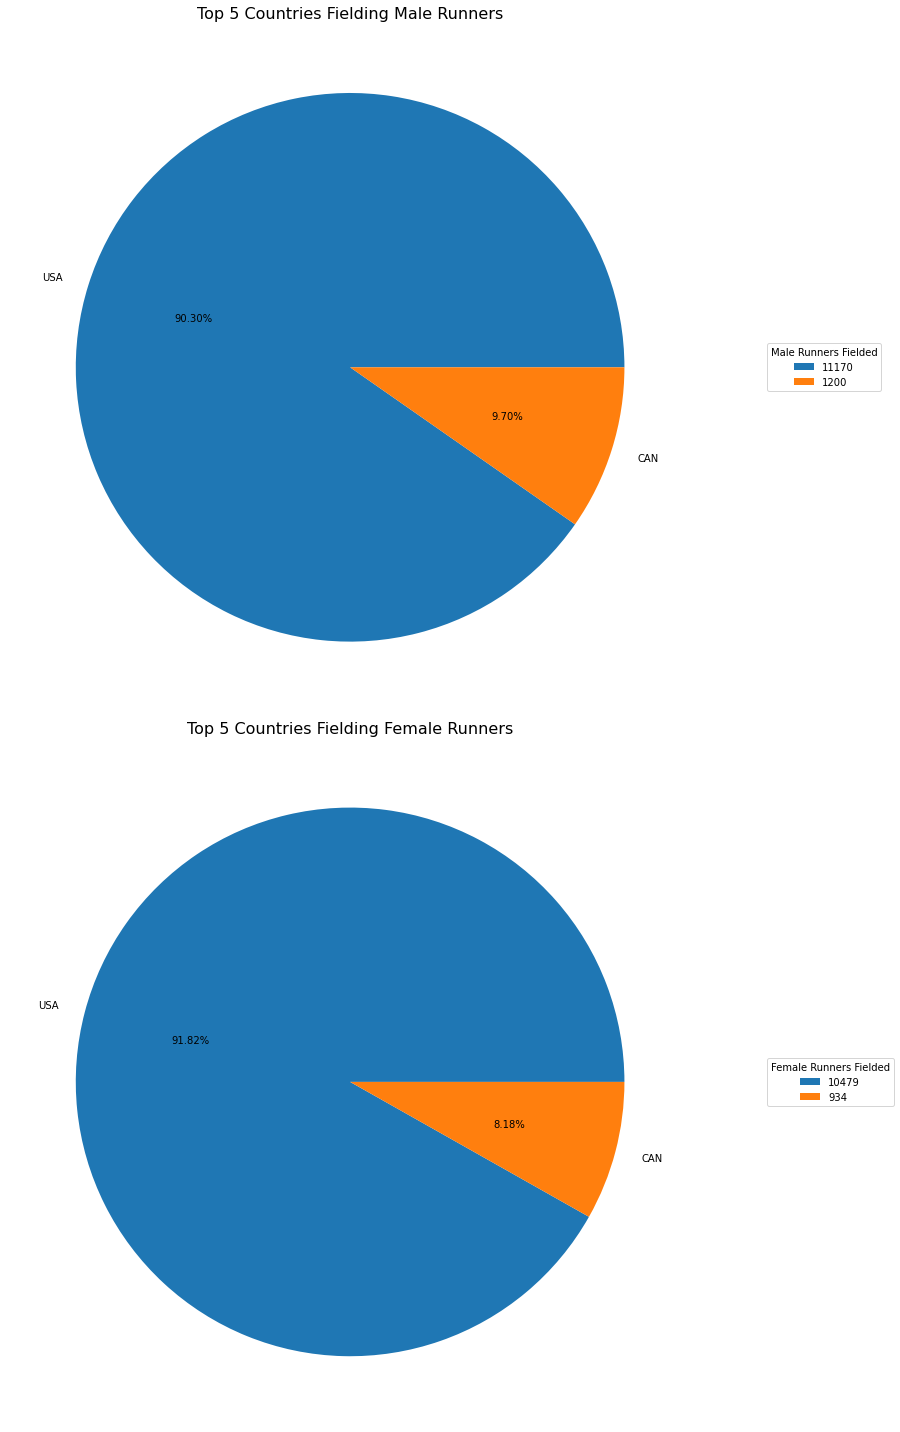

In [16]:
female_field = females['Country'].value_counts().head(5)
male_field = males['Country'].value_counts().head(5)


fig, ax = plt.subplots(2,1, figsize = (40,20))

#Plotting Male Field
ax[0].pie(male_field, labels = male_field.index, autopct='%1.2f%%')
ax[0].legend(male_field,
            title = 'Male Runners Fielded',
            loc = 'center left',
            bbox_to_anchor=(1.1, 0, 0.5, 1))
ax[0].set_title('Top 5 Countries Fielding Male Runners', fontsize = 16)

#Plotting Female field
ax[1].pie(female_field, labels = female_field.index, autopct='%1.2f%%')
ax[1].legend(female_field,
            title = 'Female Runners Fielded',
            loc = 'center left',
            bbox_to_anchor=(1.1, 0, 0.5, 1))
ax[1].set_title('Top 5 Countries Fielding Female Runners', fontsize = 16)


plt.tight_layout()
plt.show()

America has the hightest ratio of male and female athletes in the world

#### Pace

In [17]:
def time_to_sec(string):
    if string is not '-':
        time_segments = string.split(':')
        hours = int(time_segments[0])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*3600 + mins*60 + sec
        return time
    else:
        return (-1)

<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-17-4261efc334dc>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if string is not '-':


In [18]:
df1['pace_sec'] = df1['Pace'].apply(lambda x: time_to_sec(x))
df1['5K_sec'] = df1['5K'].apply(lambda x: time_to_sec(x))
df1['10K_sec'] = df1['10K'].apply(lambda x: time_to_sec(x))
df1['15K_sec'] = df1['15K'].apply(lambda x: time_to_sec(x))
df1['20K_sec'] = df1['20K'].apply(lambda x: time_to_sec(x))
df1['Half_sec'] = df1['Half'].apply(lambda x: time_to_sec(x))
df1['25K_sec'] = df1['25K'].apply(lambda x: time_to_sec(x))
df1['30K_sec'] = df1['30K'].apply(lambda x: time_to_sec(x))
df1['35K_sec'] = df1['35K'].apply(lambda x: time_to_sec(x))
df1['40K_sec'] = df1['40K'].apply(lambda x: time_to_sec(x))

df1 = df1.drop(columns = ['5K','10K','15K','20K','Half','25K','30K','35K','40K']).reset_index(drop=True)

In [19]:
males = df1[df1['M/F'] == 'M']
females= df1[(df1['M/F'] == 'F')]

In [20]:
males[males['pace_sec'] == males['pace_sec'].min()]

,Name,Age,M/F,State,Country,Pace,Official Time,Overall,Gender,Division,pace_sec,5K_sec,10K_sec,15K_sec,20K_sec,Half_sec,25K_sec,30K_sec,35K_sec,40K_sec
0,"Hine, Zachary",28,M,TX,USA,0:05:25,2:21:37,10,10,10,325,963,1928,2894,3865,4077,4838,5846,6886,7967


In [21]:
females[females['pace_sec'] ==females['pace_sec'].min()]

,Name,Age,M/F,State,Country,Pace,Official Time,Overall,Gender,Division,pace_sec,5K_sec,10K_sec,15K_sec,20K_sec,Half_sec,25K_sec,30K_sec,35K_sec,40K_sec
39,"Spence Gracey, Neely",26,F,CO,USA,0:05:55,2:35:00,69,9,9,355,1102,2181,3264,4379,4621,5495,6630,7764,8835


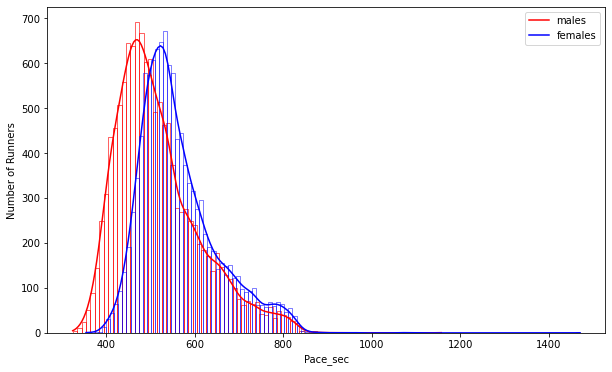

In [22]:
fig= plt.subplots(figsize = (10,6))

sns.histplot(males['pace_sec'], kde = True, color = 'r', fill = False)
sns.histplot(females['pace_sec'], color = 'b', kde = True, fill = False)
plt.xlabel('Pace_sec')
plt.ylabel('Number of Runners')
plt.legend(['males', 'females'])

In [23]:
print(males['pace_sec'].mean(), 's')
print(females['pace_sec'].mean(), 's')

517.1615198059823 s
563.5580478401822 s


In general, the speed of male athlete higher than female athlete

Pace mean of male athlete: 8:37

Pace mean of female athlete: 9:23

#### Official Time

In [24]:
df1['official_time_sec'] = df1['Official Time'].apply(lambda x: time_to_sec(x))

In [25]:
males = df1[df1['M/F'] == 'M']
females= df1[(df1['M/F'] == 'F')]

<AxesSubplot:xlabel='official_time_sec', ylabel='Count'>

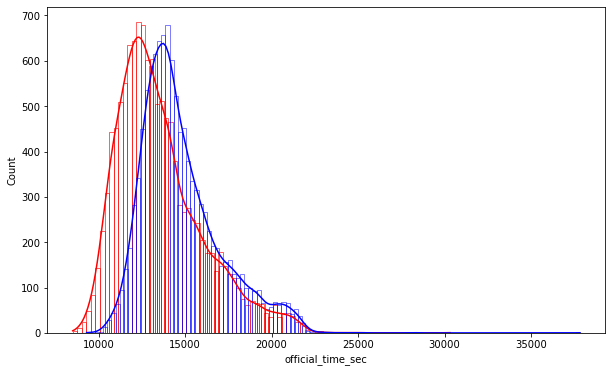

In [26]:
fig= plt.subplots(figsize = (10,6))

sns.histplot(data = males['official_time_sec'], color = 'r', kde = True, fill = False)
sns.histplot(data = females['official_time_sec'], color = 'b', kde = True, fill = False)

In [27]:
print(males['official_time_sec'].mean(), 's')
print(females['official_time_sec'].mean(), 's')

13546.446725949878 s
14762.780250591431 s


In general, the running time of males athletes less than females athletes

The mean time of males athletes : 3:45:54

The mean time of females athletes: 4:5:54

### 3.2 Int variable

In [28]:
df1.describe()

,Age,Overall,Gender,Division,pace_sec,5K_sec,10K_sec,15K_sec,20K_sec,Half_sec,25K_sec,30K_sec,35K_sec,40K_sec,official_time_sec
count,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000,23783.000000
mean,42.107346,13401.070218,6672.231678,1651.379094,539.426313,1518.742547,3054.731699,4620.573687,6235.378169,6582.737039,7894.481268,9654.459530,11507.704873,13338.940336,14130.141572
std,11.420416,7657.202683,3908.692473,1472.293757,94.141953,240.719741,488.402149,743.794406,1029.862187,1087.776097,1330.003753,1685.479577,2022.533424,2349.254277,2467.901116
min,18.000000,10.000000,9.000000,1.000000,325.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8497.000000
25%,33.000000,6804.500000,3320.500000,518.000000,474.000000,1354.000000,2717.000000,4100.000000,5529.000000,5837.500000,6983.000000,8511.000000,10121.000000,11725.000000,12422.000000
50%,42.000000,13433.000000,6615.000000,1199.000000,523.000000,1492.000000,2995.000000,4523.000000,6099.000000,6437.000000,7699.000000,9393.000000,11169.000000,12939.000000,13710.000000
75%,50.000000,19993.500000,9913.000000,2301.000000,588.000000,1643.000000,3305.000000,5001.000000,6745.000000,7119.000000,8549.500000,10479.000000,12526.000000,14552.500000,15412.000000
max,83.000000,26629.000000,14463.000000,5946.000000,1470.000000,3350.000000,5731.000000,9658.000000,16180.000000,17237.000000,16053.000000,27398.000000,24591.000000,28752.000000,37823.000000


#### Age

Text(0.5, 1.0, 'Participants per age group')

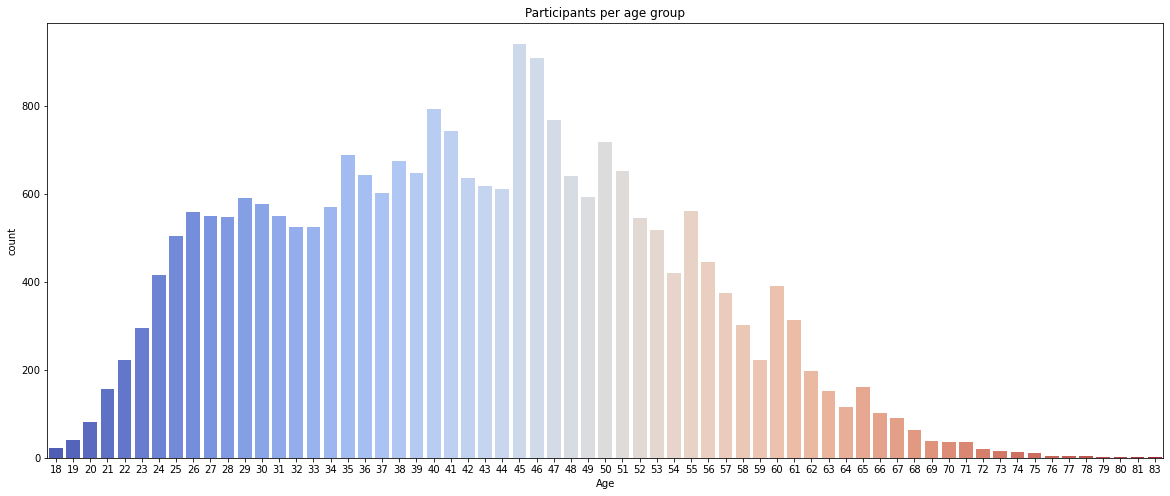

In [29]:
g = sns.countplot(x ='Age', data=df1, palette="coolwarm")
g.figure.set_size_inches(20,8)
g.set_title("Participants per age group")

Text(0.5, 1.0, 'Participants per Age & Gender')

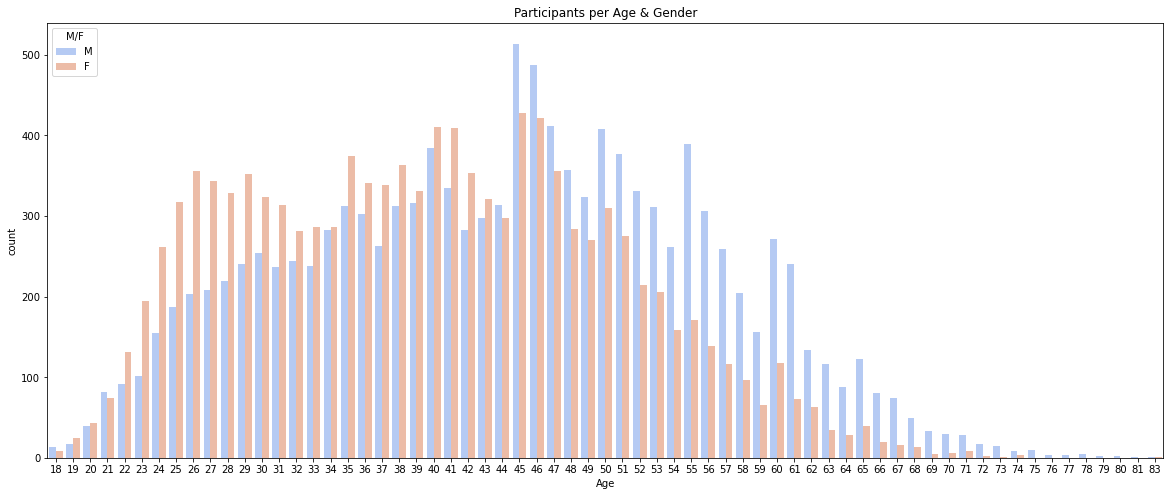

In [30]:
g = sns.countplot( x = 'Age', data = df1, palette="coolwarm", hue='M/F')
g.figure.set_size_inches(20,8)
g.set_title("Participants per Age & Gender")

In general, Ratio of female athletes at the age from 18 to 40 higher than ratio of male athletes the same age

Ratio of male athletes at the age from 41 to >70 higher than ratio of female athletes the same age

In [31]:
print(males[males['Age'] == males['Age'].max()])

                 Name  Age M/F State Country     Pace Official Time  Overall  \
21262  Wilson, Harold   83   M    TX     USA  0:11:08       4:51:41    23850   

       Gender  Division  ...  5K_sec  10K_sec  15K_sec  20K_sec  Half_sec  \
21262   13280         4  ...    1802     3664     5627     7650      8089   

       25K_sec  30K_sec  35K_sec  40K_sec  official_time_sec  
21262     9729    11967    14277    16550              17501  

[1 rows x 21 columns]


In [32]:
print(females[females['Age'] == females['Age'].max()])

                    Name  Age M/F State Country     Pace Official Time  \
23342  Beiers, Katherine   83   F    CA     USA  0:13:10       5:44:53   

       Overall  Gender  Division  ...  5K_sec  10K_sec  15K_sec  20K_sec  \
23342    26163   11889         2  ...    2184     4433     6685     9050   

       Half_sec  25K_sec  30K_sec  35K_sec  40K_sec  official_time_sec  
23342      9565    11456    14089    16847    19471              20693  

[1 rows x 21 columns]


### 4 Data transformation

In [33]:
df1.head()

,Name,Age,M/F,State,Country,Pace,Official Time,Overall,Gender,Division,...,5K_sec,10K_sec,15K_sec,20K_sec,Half_sec,25K_sec,30K_sec,35K_sec,40K_sec,official_time_sec
0,"Hine, Zachary",28,M,TX,USA,0:05:25,2:21:37,10,10,10,...,963,1928,2894,3865,4077,4838,5846,6886,7967,8497
1,"Burrell, Ian",31,M,CO,USA,0:05:26,2:22:22,13,13,13,...,954,1907,2873,3884,4104,4905,5964,7022,8079,8542
2,"Okuti, Harbert",30,M,NY,USA,0:05:32,2:24:46,15,15,15,...,953,1920,2903,3911,4128,4936,5985,7072,8182,8686
3,"Wells, Clint",40,M,CO,USA,0:05:32,2:24:55,17,17,1,...,986,1972,2970,3989,4215,5022,6078,7156,8211,8695
4,"Williams, Andy",28,M,IN,USA,0:05:37,2:27:07,21,21,20,...,981,1983,3017,4074,4300,5123,6203,7305,8364,8827


In [34]:
df2 = df1.drop(columns= ['Pace', 'Official Time', 'Name']).reset_index(drop = True)

nan_value = float("NaN")

df2.replace("", nan_value, inplace=True)

df2.dropna(inplace=True)

df2.shape

(23783, 18)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23783 entries, 0 to 23782
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                23783 non-null  int64 
 1   M/F                23783 non-null  object
 2   State              23783 non-null  object
 3   Country            23783 non-null  object
 4   Overall            23783 non-null  int64 
 5   Gender             23783 non-null  int64 
 6   Division           23783 non-null  int64 
 7   pace_sec           23783 non-null  int64 
 8   5K_sec             23783 non-null  int64 
 9   10K_sec            23783 non-null  int64 
 10  15K_sec            23783 non-null  int64 
 11  20K_sec            23783 non-null  int64 
 12  Half_sec           23783 non-null  int64 
 13  25K_sec            23783 non-null  int64 
 14  30K_sec            23783 non-null  int64 
 15  35K_sec            23783 non-null  int64 
 16  40K_sec            23783 non-null  int64

In [38]:
cat_feature = df2.select_dtypes('object')
num_feature = df2.select_dtypes(np.number)

scaled_cat = cat_feature.apply(LabelEncoder().fit_transform)

scaler = MinMaxScaler()
scaler.fit(num_feature)
scaled_num = scaler.transform(num_feature)
scaled_num = pd.DataFrame(scaled_num, columns=num_feature.columns)
Data = pd.concat([scaled_num, scaled_cat], axis=1)

Data

,Age,Overall,Gender,Division,pace_sec,5K_sec,10K_sec,15K_sec,20K_sec,Half_sec,25K_sec,30K_sec,35K_sec,40K_sec,official_time_sec,M/F,State,Country
0,0.153846,0.000000,0.000069,0.001514,0.000000,0.287675,0.336532,0.299720,0.238922,0.236570,0.301420,0.213402,0.280050,0.277119,0.000000,1,57,1
1,0.200000,0.000113,0.000277,0.002019,0.000873,0.284990,0.332868,0.297546,0.240096,0.238137,0.305594,0.217709,0.285581,0.281014,0.001534,1,9,1
2,0.184615,0.000188,0.000415,0.002355,0.006114,0.284691,0.335136,0.300652,0.241765,0.239529,0.307525,0.218475,0.287614,0.284596,0.006445,1,43,1
3,0.338462,0.000263,0.000553,0.000000,0.006114,0.294539,0.344208,0.307589,0.246586,0.244576,0.312882,0.221869,0.291030,0.285605,0.006752,1,9,1
4,0.153846,0.000413,0.000830,0.003196,0.010480,0.293047,0.346127,0.312455,0.251839,0.249507,0.319173,0.226432,0.297088,0.290926,0.011253,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,0.430769,0.999850,0.840944,0.319428,0.651528,0.842734,0.963364,0.924526,0.773005,0.766736,0.999938,0.709989,0.949943,0.000000,0.667633,0,8,1
23779,0.446154,0.999887,0.841013,0.319596,0.651528,0.843032,0.963538,0.924630,0.773067,0.766794,1.000000,0.709989,0.949984,0.929155,0.667633,0,8,1
23780,0.323077,0.999925,0.999931,0.807401,0.723144,0.758878,0.940335,0.893467,0.759842,0.758209,0.993771,0.721486,0.981010,0.989879,0.740299,1,63,1
23781,0.261538,0.999962,1.000000,0.807569,0.726638,0.644285,0.786811,0.734030,0.627650,0.627857,0.924131,0.718274,1.000000,1.000000,0.743777,1,56,1


### 5 Model training

### 5.1 without dropping high correlation features

[6914487.765279898, 1597222.374151262, 761140.456484131, 322132.46704050875, 216250.5326533059, 162826.13155821626, 134740.73835007055, 104521.3835729861, 83931.71081098031]


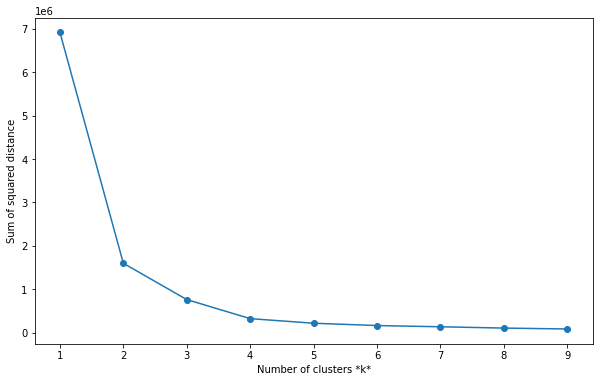

In [39]:
sse = []
K = list(range(1, 10))

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data)
    sse.append(kmeans.inertia_)

# Plot sse against k#
print(sse)
plt.figure(figsize=(10, 6))
plt.plot(K, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()

In [40]:
km = KMeans(n_clusters=4)
km.fit(Data)
km.inertia_

322132.46704050875

In [41]:
cluster = km.labels_
print(len(cluster))

23783


In [42]:
df3 = df2.copy()
df3['cluster'] = cluster
df3

,Age,M/F,State,Country,Overall,Gender,Division,pace_sec,5K_sec,10K_sec,15K_sec,20K_sec,Half_sec,25K_sec,30K_sec,35K_sec,40K_sec,official_time_sec,cluster
0,28,M,TX,USA,10,10,10,325,963,1928,2894,3865,4077,4838,5846,6886,7967,8497,2
1,31,M,CO,USA,13,13,13,326,954,1907,2873,3884,4104,4905,5964,7022,8079,8542,3
2,30,M,NY,USA,15,15,15,332,953,1920,2903,3911,4128,4936,5985,7072,8182,8686,0
3,40,M,CO,USA,17,17,1,332,986,1972,2970,3989,4215,5022,6078,7156,8211,8695,3
4,28,M,IN,USA,21,21,20,337,981,1983,3017,4074,4300,5123,6203,7305,8364,8827,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,46,F,CA,USA,26625,12164,1900,1071,2823,5521,8929,12507,13216,16052,19452,23360,-1,28076,3
23779,47,F,CA,USA,26626,12165,1901,1071,2824,5522,8930,12508,13217,16053,19452,23361,26715,28076,3
23780,39,M,WI,USA,26627,14462,4801,1153,2542,5389,8629,12294,13069,15953,19767,24124,28461,30207,2
23781,35,M,TN,USA,26628,14463,4802,1157,2158,4509,7089,10155,10822,14835,19679,24591,28752,30309,2


In [43]:
c0 = df3[df3.cluster == 0]
c1 = df3[df3.cluster == 1]
c2 = df3[df3.cluster == 2]
c3 = df3[df3.cluster == 3]

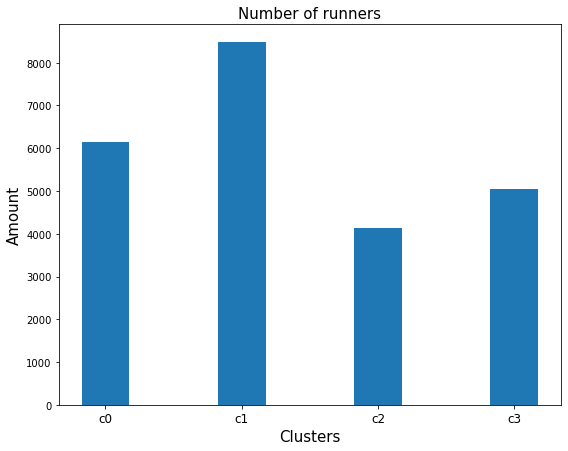

In [44]:
plt.figure(figsize=(9,7))
plt.bar( [0,1,2,3],[c0.shape[0],c1.shape[0],c2.shape[0],c3.shape[0]], width=0.35)
plt.xticks([0,1,2,3], ['c0','c1','c2','c3'], fontsize=12)

plt.xlabel('Clusters', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Number of runners', fontsize=15)

plt.show()

In [45]:
cluster_gender = pd.concat((c0['M/F'].value_counts(),c1['M/F'].value_counts(),c2['M/F'].value_counts(),c3['M/F'].value_counts()), axis=1, keys=['c0','c1','c2','c3'])
cluster_gender

,c0,c1,c2,c3
M,3312,4255,2171,2632
F,2823,4220,1962,2408


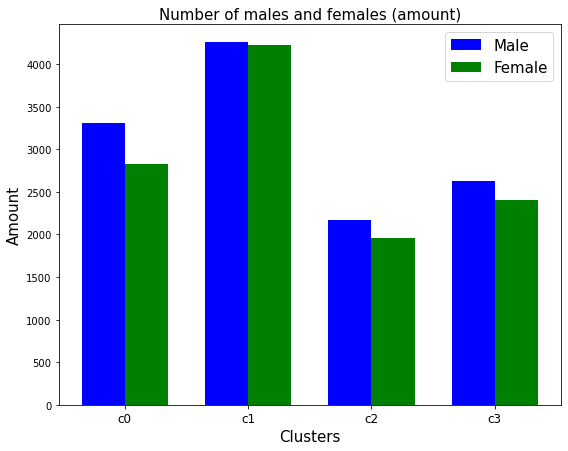

In [46]:
plt.figure(figsize=(9,7))
M = cluster_gender.loc['M']
F = cluster_gender.loc['F']
idx = np.arange(4)
bar_width = 0.35

plt.bar(idx - bar_width/2, M, color='b', width=bar_width, label='Male')
plt.bar(idx + bar_width/2, F, color='g', width=bar_width, label='Female')

plt.xticks(idx, cluster_gender.columns, fontsize=12)
plt.legend(fontsize=15)
plt.xlabel('Clusters', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Number of males and females (amount)', fontsize=15)

plt.show()

In [47]:
# copy = df1.copy()
# bins = [17,25,40, 70, 85]
# copy['Ranges'] = pd.cut(copy['Age'],bins,labels=["18-25","26-40","41-70",">70"]) 
# copy2 = pd.crosstab(copy.Ranges,copy['M/F']).apply(lambda r: (r/r.sum()) * 100 , axis=1)

# copy['Ranges']
# outcome = copy2.plot(kind = "bar", stacked = True, color = ['pink','y'], figsize=(9,6),fontsize=12, position=0.5)
# # outcome.get_legend_handles_labels
# outcome.legend(bbox_to_anchor = (1.3, 1))
# outcome.set_title('Marathon participants - Gender and Age', fontsize=20)
# outcome.set_xlabel('Age', fontdict={'size':12})
# outcome.set_ylabel('Percentages (%)', fontdict={'size':12})
# plt.show()

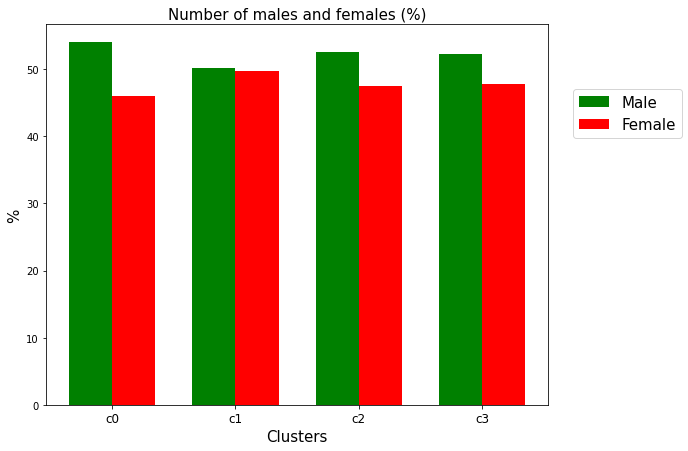

In [53]:
plt.figure(figsize=(9,7))
M_percent = cluster_gender.apply(lambda x: x.loc['M']/(x.loc['M']+x.loc['F'])*100)
F_percent = cluster_gender.apply(lambda x: x.loc['F']/(x.loc['M']+x.loc['F'])*100)
idx = np.arange(4)
bar_width = 0.35

plt.bar(idx - bar_width/2, M_percent, color='g', width=bar_width, label='Male')
plt.bar(idx + bar_width/2, F_percent, color='r', width=bar_width, label='Female')

plt.xticks(idx, cluster_gender.columns, fontsize=12)
plt.legend(fontsize=15, loc=(1.05, 0.7))
plt.xlabel('Clusters', fontsize=15)
plt.ylabel('%', fontsize=15)
plt.title('Number of males and females (%)', fontsize=15)

plt.show()

In [49]:
bins = pd.IntervalIndex.from_tuples([(18, 25), (26, 40), (41, 70), (71, 90)], closed='both')
age_c0 = pd.cut(c0.Age, bins=bins)
age_c1 = pd.cut(c1.Age, bins=bins)
age_c2 = pd.cut(c2.Age, bins=bins)
age_c3 = pd.cut(c3.Age, bins=bins)
cluster_age = pd.concat((age_c0.value_counts().sort_index(),age_c1.value_counts().sort_index(),age_c2.value_counts().sort_index(),age_c3.value_counts().sort_index()), axis=1, keys=['c0','c1','c2','c3'])
cluster_age

,c0,c1,c2,c3
"[18, 25]",393,894,216,236
"[26, 40]",2221,3566,1501,1761
"[41, 70]",3490,3988,2391,3012
"[71, 90]",31,27,25,31


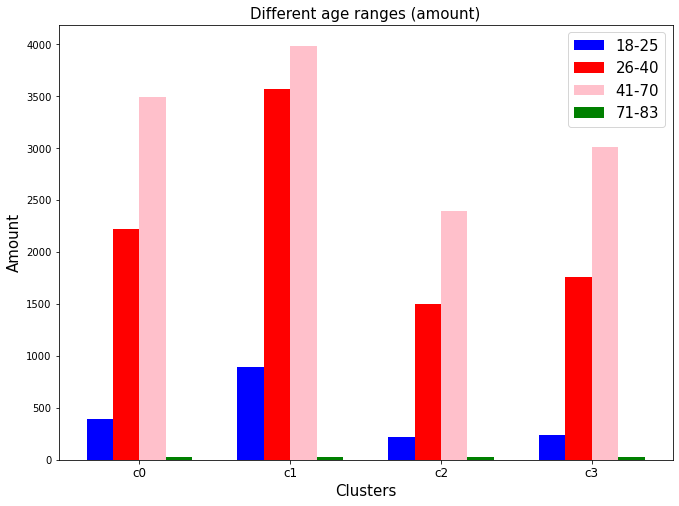

In [50]:
plt.figure(figsize=(11,8))

age_18_25 = cluster_age.iloc[0]
age_26_40 = cluster_age.iloc[1]
age_41_70 = cluster_age.iloc[2]
age_71_83 = cluster_age.iloc[3]
idx = np.arange(0,8,2)
bar_width = 0.35

plt.bar(idx - bar_width*1.5, age_18_25, color='b', width=bar_width, label='18-25')
plt.bar(idx - bar_width/2, age_26_40, color='r', width=bar_width, label='26-40')
plt.bar(idx + bar_width/2, age_41_70, color='pink', width=bar_width, label='41-70')
plt.bar(idx + bar_width*1.5, age_71_83, color='g', width=bar_width, label='71-83')

plt.xticks(idx, cluster_age.columns, fontsize=12)
plt.legend(fontsize=15)
plt.xlabel('Clusters', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Different age ranges (amount)', fontsize=15)

plt.show()

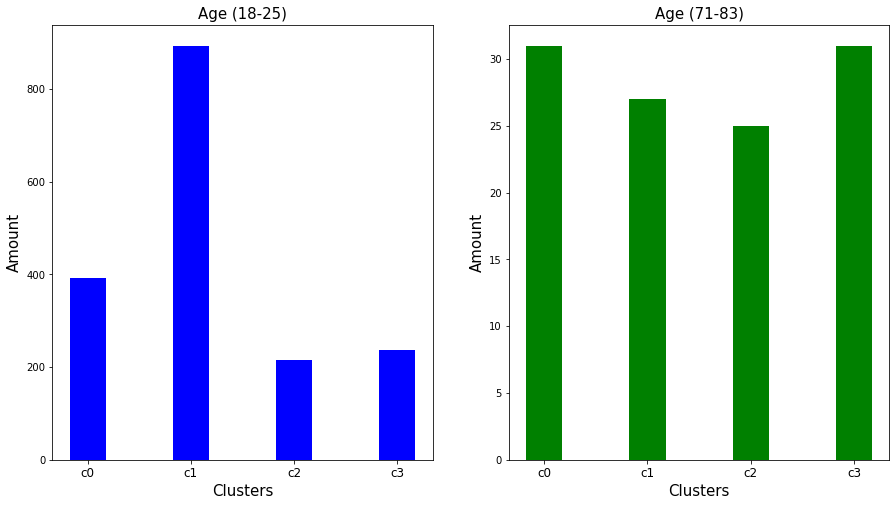

In [51]:
plt.figure(figsize=(15,8))

idx = np.arange(4)
plt.subplot(121)
plt.bar(idx, age_18_25, color='b', width=bar_width, label='Male')
plt.xticks(idx, cluster_age.columns, fontsize=12)
plt.xlabel('Clusters', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Age (18-25)', fontsize=15)

plt.subplot(122)
plt.bar(idx, age_71_83, color='g', width=bar_width, label='Male')
plt.xticks(idx, cluster_age.columns, fontsize=12)
plt.xlabel('Clusters', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.title('Age (71-83)', fontsize=15)

plt.show()

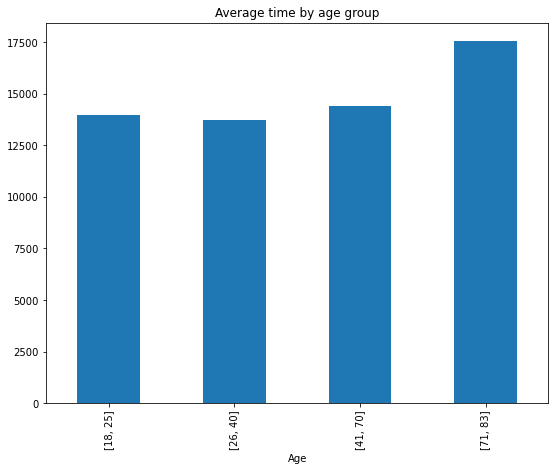

In [52]:
plt.figure(figsize=(9,7))
df3['official_time_sec'].groupby(pd.cut(df3['Age'], pd.IntervalIndex.from_tuples([(18, 25), (26, 40), (41, 70), (71, 83)], 
                                                                                 closed='both'))).aggregate(np.average).plot(kind="bar", title="Average time by age group")
plt.show()